In [1]:
import ephem
import sys
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
sys.path.append('../')

from sky import *

edi = ephem.city("Edinburgh")
edi.date = datetime(2017, 6, 21, 10, 0, 0)
sky = SkyModel(edi)
sky.generate()
lon, lat = sun2lonlat(sky.sun)

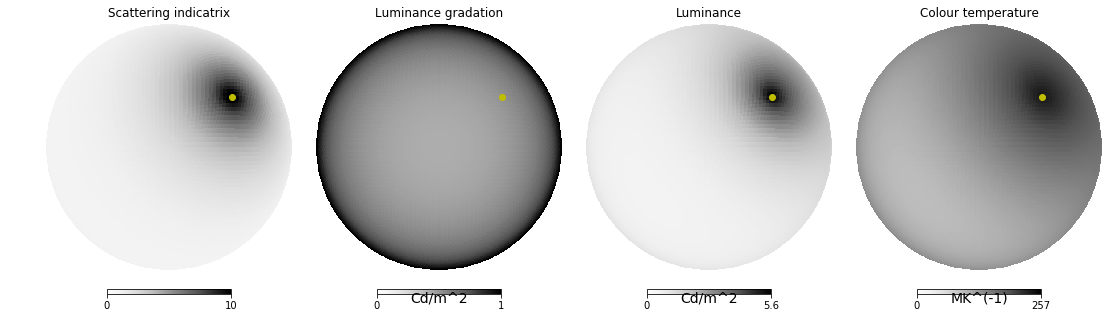

In [2]:
SkyModel.plot_luminance(sky)

In [3]:
# polariser = Polariser(0)
# I_0 = sky.L
# I_1 = polariser.apply(sky)
# I_2 = polariser.rotate(np.pi/3).apply(sky)
# I_3 = polariser.rotate(np.pi/3).apply(sky)

E = np.sqrt(sky.L)
E_par = E * np.sqrt(sky.DOP)   * np.array([np.sin(sky.AOP), np.cos(sky.AOP)])
E_per = E * np.sqrt(1.-sky.DOP) * np.array([np.sin(sky.AOP + np.pi/2), np.cos(sky.AOP + np.pi/2)])

I_0 = (np.square(E_par) + np.square(E_per)).sum(axis=0)

R = lambda (x): np.array([[np.cos(x), -np.sin(x)], [np.sin(x), np.cos(x)]])
# 0 deg polarisation
theta = 0
I_1 = np.square(np.dot(R(theta), E_par)[1]) # + np.square(np.dot(R(theta), E_per)[1])
I_1[I_0>0] /= I_0[I_0>0]

# 60 deg polarisation
theta = np.pi/3
I_2 = np.square(np.dot(R(theta), E_par)[1]) # + np.square(np.dot(R(theta), E_par)[0])
I_2[I_0>0] /= I_0[I_0>0]

# 120 deg polarisation
theta = -np.pi/3
I_3 = np.square(np.dot(R(theta), E_par)[1]) # + np.square(np.dot(R(theta), E_par)[0])
I_3[I_0>0] /= I_0[I_0>0]

print "I_0", I_0.min(), I_0.max()
print "I_1", I_1.min(), I_1.max()
print "I_2", I_2.min(), I_2.max()
print "I_3", I_3.min(), I_3.max()

I_0 0.0 5.6775692664
I_1 0.0 0.799692948349
I_2 0.0 0.799656937684
I_3 0.0 0.799955254551


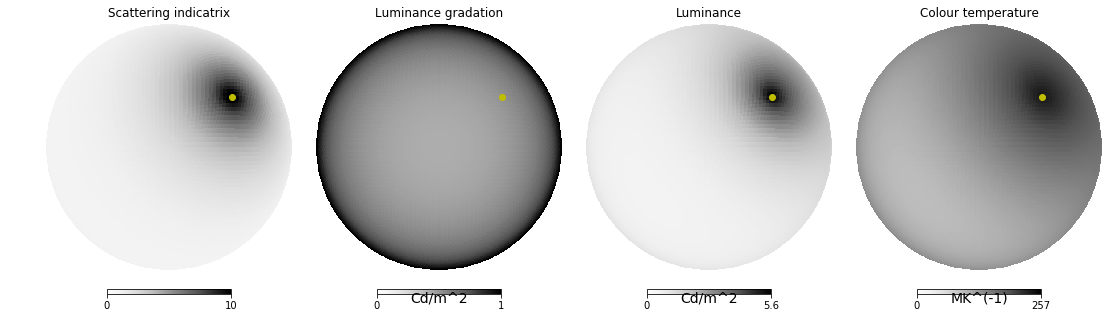

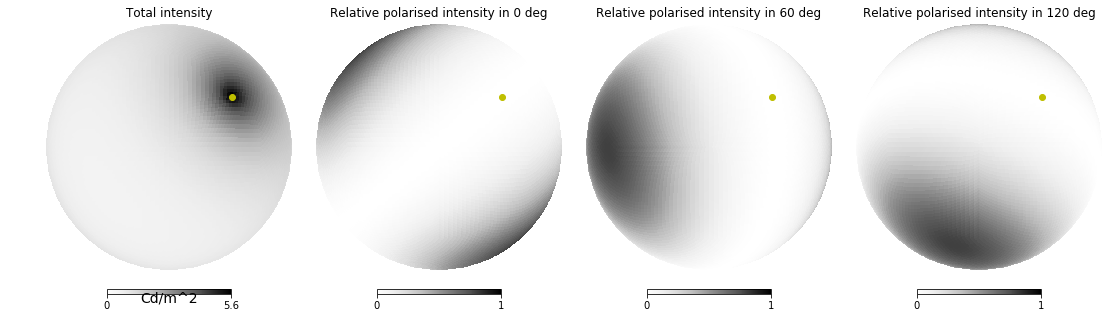

In [4]:
plt.figure(2, figsize=(15, 5))
hp.orthview(I_0, rot=sky.VIEW_ROT, min=0, max=5.6, flip="geo", cmap="Greys", half_sky=True,
               title="Total intensity", unit=r'Cd/m^2', sub=(1,4,1), fig=2)
hp.orthview(I_1, rot=sky.VIEW_ROT, min=0, max=1, flip="geo", cmap="Greys", half_sky=True,
               title="Relative polarised intensity in 0 deg", unit=r'', sub=(1,4,2), fig=2)
hp.orthview(I_2, rot=sky.VIEW_ROT, min=0, max=1, flip="geo", cmap="Greys", half_sky=True,
               title="Relative polarised intensity in 60 deg", unit=r'', sub=(1,4,3), fig=2)
hp.orthview(I_3, rot=sky.VIEW_ROT, min=0, max=1, flip="geo", cmap="Greys", half_sky=True,
               title="Relative polarised intensity in 120 deg", unit=r'', sub=(1,4,4), fig=2)
hp.projplot(lat, lon, 'yo')
plt.show()

In [5]:
I = I_0
# I = 2./3. * (I_1 + I_2 + I_3)
print "I", I.min(), I.max()
Q = 2./3. * (2 * I_1 - I_2 - I_3)
print "Q", Q.min(), Q.max()
U = 2./np.sqrt(3) * (I_2 - I_3)
print "U", U.min(), U.max()
V = np.zeros_like(I_1)
print "V", V.min(), V.max()

I 0.0 5.6775692664
Q -0.799796534713 0.799569476972
U -0.799925570143 0.799371823858
V 0.0 0.0


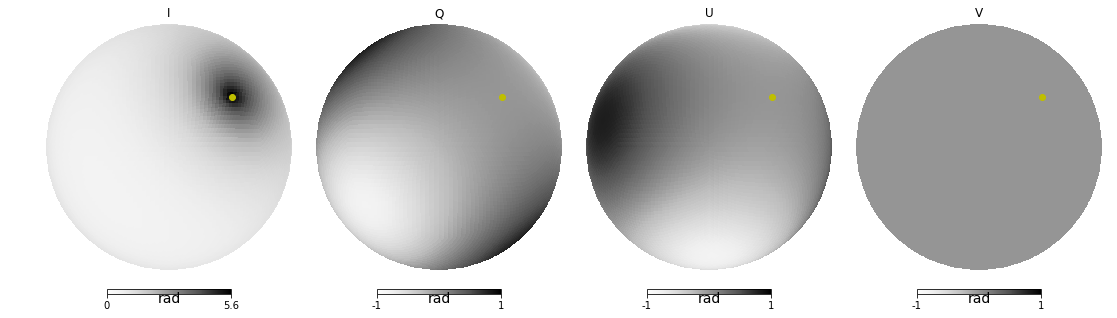

In [6]:
plt.figure(3, figsize=(15, 5))
hp.orthview(I, rot=sky.VIEW_ROT, min=0, max=5.6, flip="geo", cmap="Greys", half_sky=True,
               title="I", unit=r'rad', sub=(1,4,1), fig=3)
hp.orthview(Q, rot=sky.VIEW_ROT, min=-1, max=1, flip="geo", cmap="Greys", half_sky=True,
               title="Q", unit=r'rad', sub=(1,4,2), fig=3)
hp.orthview(U, rot=sky.VIEW_ROT, min=-1, max=1, flip="geo", cmap="Greys", half_sky=True,
               title="U", unit=r'rad', sub=(1,4,3), fig=3)
hp.orthview(V, rot=sky.VIEW_ROT, min=-1, max=1, flip="geo", cmap="Greys", half_sky=True,
               title="V", unit=r'rad', sub=(1,4,4), fig=3)
hp.projplot(lat, lon, 'yo')
plt.show()

In [7]:
DOP = np.sqrt(np.square(Q) + np.square(U))
print "DOP", DOP.min(), DOP.max()
print "dop", sky.DOP.min(), sky.DOP.max()
AOP = .5 * np.arctan2(U, Q)
print "AOP", AOP.min(), AOP.max()
print "aop", sky.AOP.min(), sky.AOP.max()

DOP 0.0 0.799999378044
dop 4.40385341695e-05 0.799999378044
AOP -1.57012350181 1.57035406235
aop 5.64831395424e-05 3.14101841663


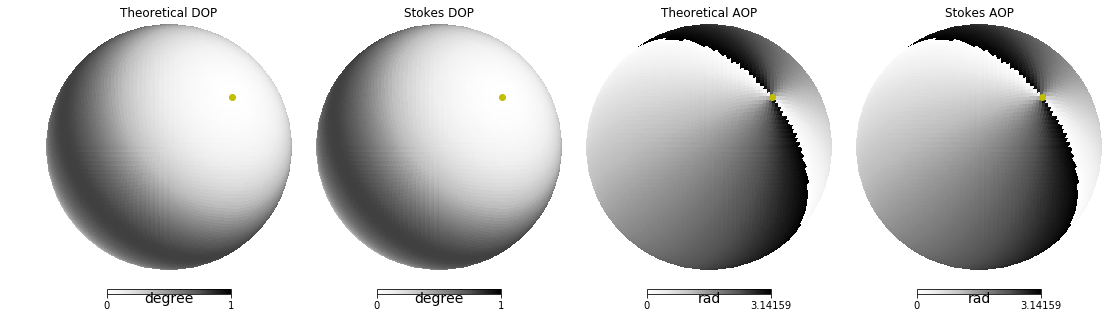

In [8]:
plt.figure(5, figsize=(15, 5))
hp.orthview(sky.DOP, rot=sky.VIEW_ROT, min=0, max=1, flip="geo", cmap="Greys", half_sky=True,
               title="Theoretical DOP", unit=r'degree', sub=(1,4,1), fig=5)
hp.orthview(DOP, rot=sky.VIEW_ROT, min=0, max=1, flip="geo", cmap="Greys", half_sky=True,
               title="Stokes DOP", unit=r'degree', sub=(1,4,2), fig=5)
hp.orthview(sky.AOP, rot=sky.VIEW_ROT, min=0, max=np.pi, flip="geo", cmap="Greys", half_sky=True,
               title="Theoretical AOP", unit=r'rad', sub=(1,4,3), fig=5)
hp.orthview(AOP % np.pi, rot=sky.VIEW_ROT, min=0, max=np.pi, flip="geo", cmap="Greys", half_sky=True,
               title="Stokes AOP", unit=r'rad', sub=(1,4,4), fig=5)
hp.projplot(lat, lon, 'yo')
plt.show()

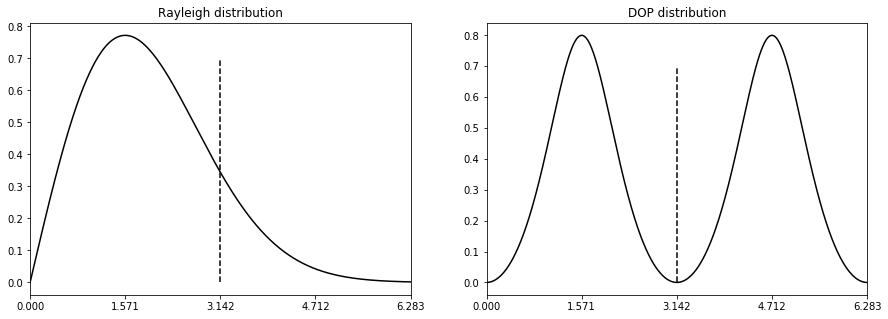

In [9]:
plt.figure(5, figsize=(15, 5))
x = np.linspace(0, 2 * np.pi, 1000, endpoint=True)
plt.subplot(1,2,1)
plt.plot(x, 2 * rayleigh(x), 'k-')
plt.plot([np.pi, np.pi], [0, .7], 'k--')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
plt.xlim([0,2*np.pi])
plt.title("Rayleigh distribution")

plt.subplot(1,2,2)
plt.plot(x, degree_of_polarisation(x), 'k-')
plt.plot([np.pi, np.pi], [0, .7], 'k--')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
plt.xlim([0,2*np.pi])
plt.title("DOP distribution")
plt.show()